In [1]:
import glob 
import numpy as np
from PIL import Image

In [2]:
dir_file = glob.glob('*')

In [3]:
occ_map = []
zzz = 0
for di in dir_file:
    list_occ = glob.glob(di+'/*')
    mapping = np.zeros((1024,2048))
    for im in list_occ:
        img =  (np.asarray(Image.open(im)))
        #1 is yellow, 2 is red
        occ_amount = (float((img[:,:,0]==255).sum()) - (img[:,:,1]==255).sum())/float((img[:,:,0]==255).sum())
        my_map = img[:,:,0] - img[:,:,1]
        #print (my_map.sum)
        occ_map.append(occ_amount)
        print (occ_amount)
        my_map = my_map.astype(float)
        my_map[my_map == 255] = occ_amount*100
        mapping += my_map
    np.save(di, mapping)

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
occ_map = np.array(occ_map)
(occ_map < 0.01).sum()

1

(array([ 244.,  355.,  330.,  307.,  277.,  245.,  257., 1328.]),
 array([  0.93203437,  13.31553007,  25.69902577,  38.08252148,
         50.46601718,  62.84951289,  75.23300859,  87.6165043 ,
        100.        ]),
 <a list of 8 Patch objects>)

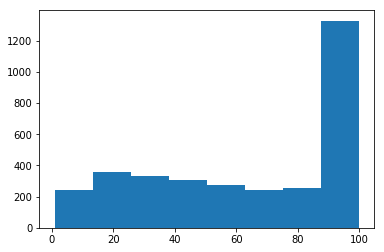

In [6]:
plt.hist(occ_map*100, bins= 8)

(array([ 244.,  355.,  330.,  307.,  277.,  245.,  257., 1328.]),
 array([  0.93203437,  13.31553007,  25.69902577,  38.08252148,
         50.46601718,  62.84951289,  75.23300859,  87.6165043 ,
        100.        ]),
 <a list of 8 Patch objects>)

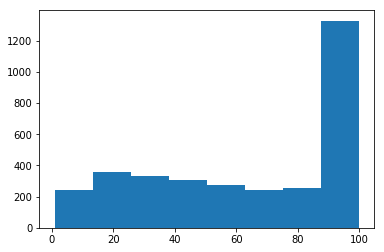

In [7]:
plt.hist(occ_map*100, bins= 8)

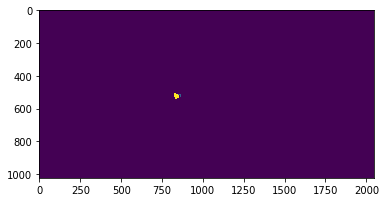

In [8]:
plt.imshow(mapping)

In [9]:
mapping

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
mapping.max()

29.068462401795735

In [11]:
occ_map.max()

1.0